In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
tata_motors=pd.read_csv("TATAMOTORS.csv")
tata_steel=pd.read_csv("TATASTEEL.csv")
tcs=pd.read_csv("TCS.csv")

In [7]:
tata_motors.shape

(5306, 15)

In [8]:
tata_motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [9]:
tata_motors.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [10]:
tata_motors.duplicated().sum()

tata_steel.duplicated().sum()

tcs.duplicated().sum()

0

In [11]:
tata_motors.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03,2456.00,4792.00,4792.00
mean,409.43,410.15,417.12,402.18,409.45,409.45,409.76,1.046560e+07,2.790772e+14,128439.98,2805962.22,0.36
std,272.48,272.97,277.02,268.03,272.52,272.47,272.49,2.185034e+07,4.674351e+14,104954.58,3579713.03,0.16
min,58.80,58.00,60.70,57.55,58.75,58.80,59.24,1.235100e+04,1.069384e+11,3434.00,12351.00,0.04
25%,174.60,174.76,178.82,171.01,174.72,174.60,175.18,1.668994e+06,7.049025e+13,75478.25,646920.00,0.23
50%,377.25,378.90,384.75,372.60,377.52,377.25,378.46,4.141648e+06,1.967418e+14,100034.00,1636751.50,0.36
75%,523.15,523.48,530.80,515.91,523.49,523.15,523.72,8.706037e+06,3.175959e+14,142064.75,3761212.25,0.48
max,1365.15,1361.00,1382.00,1347.00,1362.00,1365.15,1362.15,3.905778e+08,9.365671e+15,1318669.00,73338482.00,1.00


In [12]:
tata_motors["Date"]=pd.to_datetime(tata_motors["Date"])
tata_steel["Date"]=pd.to_datetime(tata_steel["Date"])
tcs["Date"]=pd.to_datetime(tcs["Date"])

In [13]:
tata_motors=tata_motors.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tata_steel=tata_steel.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tcs=tcs.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)

In [14]:
tata_motors['Month']=tata_motors["Date"].dt.month

tata_motors['Year']=tata_motors["Date"].dt.year

tata_motors['Day']=tata_motors["Date"].dt.day


tata_steel['Month']=tata_steel["Date"].dt.month

tata_steel['Year']=tata_steel["Date"].dt.year

tata_steel['Day']=tata_steel["Date"].dt.day


tcs['Day']=tcs['Date'].dt.day

tcs['Year']=tcs['Date'].dt.year

tcs['Month']=tcs['Date'].dt.month

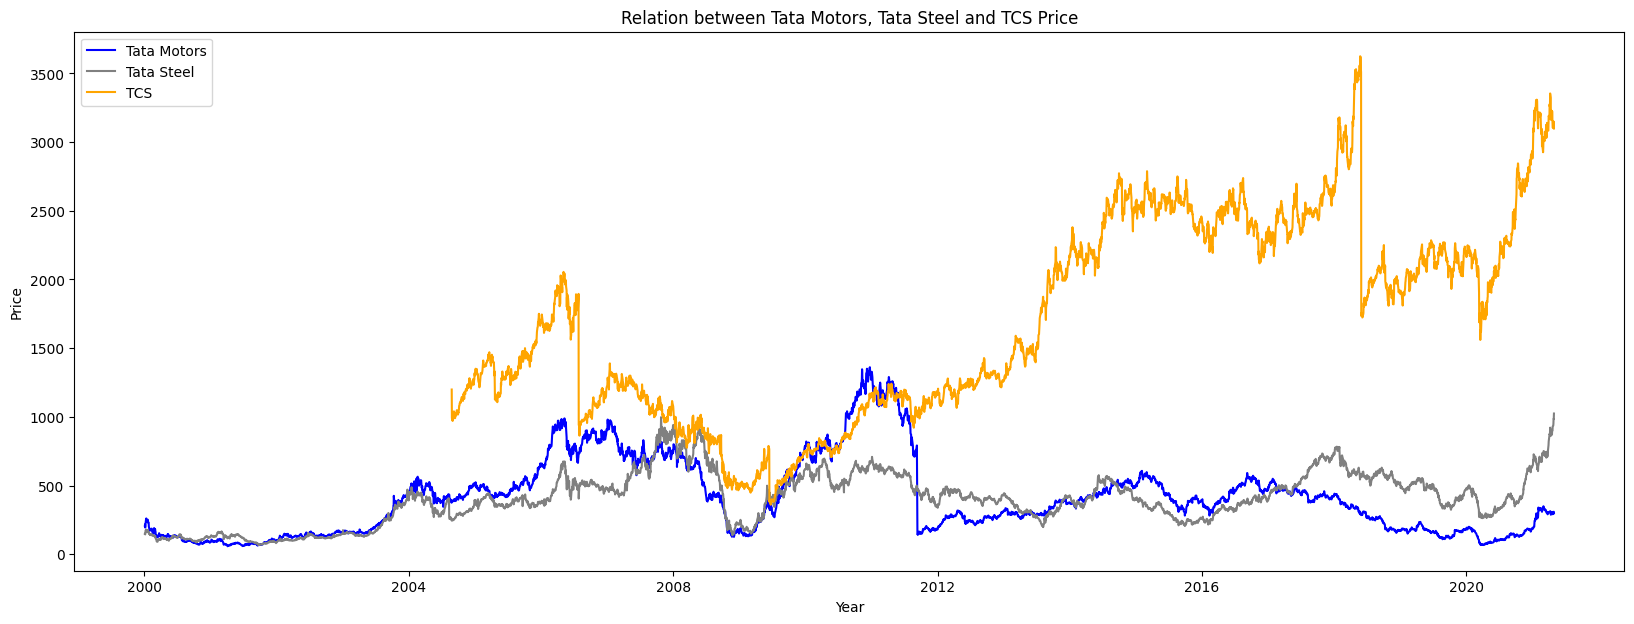

In [15]:
plt.figure(figsize=(20,7))

plt.plot(tata_motors['Date'],tata_motors['Open'],color='blue',label='Tata Motors')

plt.plot(tata_steel['Date'],tata_steel['Open'],color='grey',label='Tata Steel')

plt.plot(tcs['Date'],tcs['Open'],color='orange',label='TCS')


plt.title("Relation between Tata Motors, Tata Steel and TCS Price")

plt.xlabel("Year")

plt.ylabel("Price")

plt.legend(title="")

plt.show()

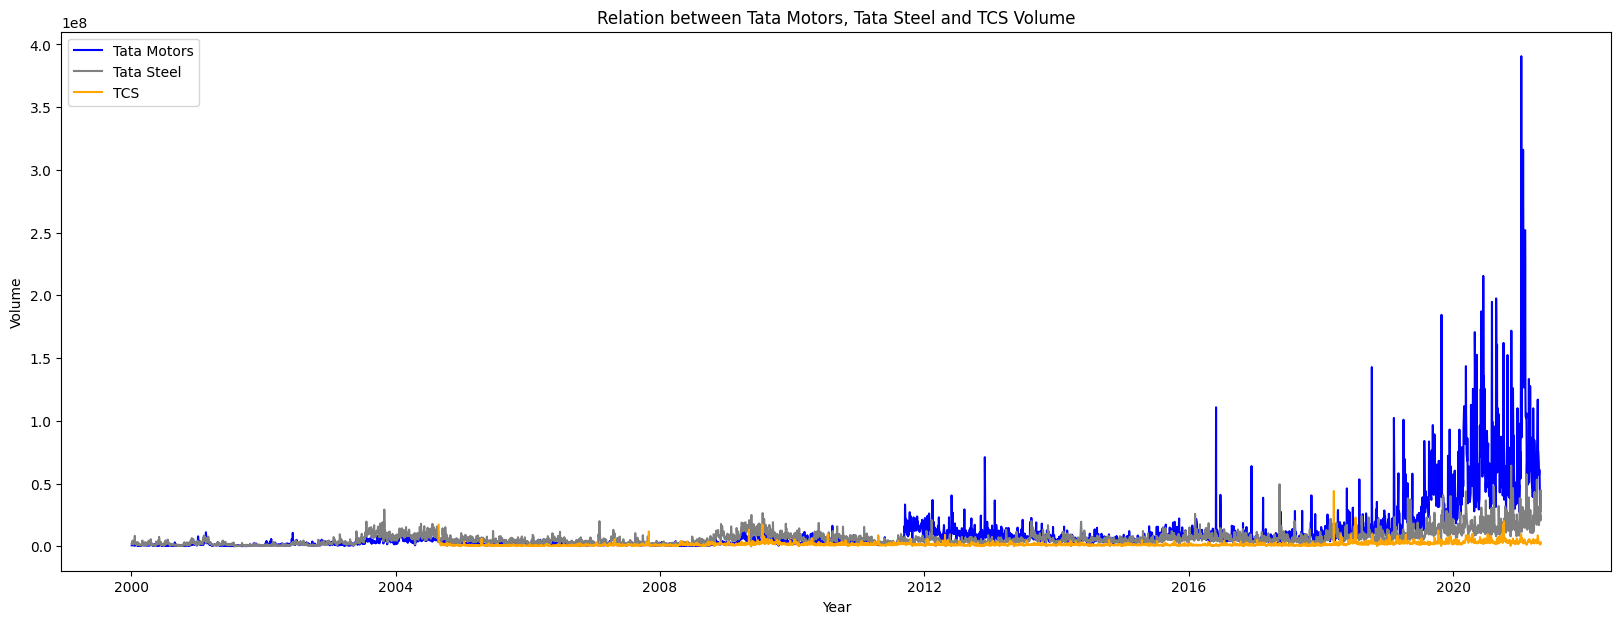

In [16]:
plt.figure(figsize=(20,7))

plt.plot(tata_motors['Date'],tata_motors['Volume'],color='blue',label='Tata Motors')

plt.plot(tata_steel['Date'],tata_steel['Volume'],color='grey',label='Tata Steel')

plt.plot(tcs['Date'],tcs['Volume'],color='orange',label='TCS')



plt.title("Relation between Tata Motors, Tata Steel and TCS Volume")

plt.xlabel("Year")

plt.ylabel("Volume")

plt.legend(title="")

plt.show()

In [17]:
sumTM=0 #total amount invested in Tata Motors

s1=0 #number of shares owned by Tata Motors

#calcuating total amount invested and number of shares owned in Tata Motors

for i in range(len(tata_motors)):

    if tata_motors.loc[i,'Day']==30:

        sumTM+=tata_motors.loc[i,'Open']

        s1+=1

#displaying basic results

print("Total Invested in Tata Motors = Rs",round(sumTM,2))

print("Shares Owned of Tata Motors =",s1)

print("Average Investmentment of 1 share = Rs",round((sumTM/s1),2))



tm_end=298.2 #last open price of Tata Motors on 2021-04-30

#obtained by looking at the data or can be seen after executing tata_motors.tail()

#calculating investment results

result1=round((tm_end*s1)-sumTM,2)

roiTM=round((result1/sumTM)*100,2)


#displaying investment results

print("nInvestment Result:")


if result1<0:

    print("Net Unrealised Loss = Rs",result1)

else:

    print("Net Unrealised Profit = Rs",result1)



print("Tata Motors ROI from 2000-1-3 to 2021-04-30 =",roiTM,"%")

Total Invested in Tata Motors = Rs 65977.3
Shares Owned of Tata Motors = 162
Average Investmentment of 1 share = Rs 407.27
nInvestment Result:
Net Unrealised Loss = Rs -17668.9
Tata Motors ROI from 2000-1-3 to 2021-04-30 = -26.78 %


In [18]:
sumTS=0 #total amount invested in Tata Steel

s2=0 #number of shares owned by Tata Steel

#calcuating total amount invested and number of shares owned in Tata Steel

for i in range(len(tata_steel)):

    if tata_steel.loc[i,'Day']==30:

        sumTS+=tata_steel.loc[i,'Open']

        s2+=1


#displaying basic results

print("Total Invested in Tata Steel = Rs",round(sumTS,2))

print("Shares Own of Tata Steel =",s2)

print("Average Investmentment of 1 share = Rs",round((sumTS/s2),2))



ts_end=1024 #last open price of Tata Steel on 2021-04-30

#obtained by looking at the data or can be seen after executed tata_steel.tail()


#calculating investment results

result2=round((ts_end*s2)-sumTS,2)

roiTS=round((result2/sumTS)*100,2)



#displaying investment results

print("nInvestment Result:")



if result2<0:

    print("Net Unrealised Loss = Rs",result2)

else:

    print("Net Unrealised Profit = Rs",result2)

print("Tata Steel ROI from 2000-1-3 to 2021-04-30 =",roiTS,"%")

Total Invested in Tata Steel = Rs 65825.9
Shares Own of Tata Steel = 162
Average Investmentment of 1 share = Rs 406.33
nInvestment Result:
Net Unrealised Profit = Rs 100062.1
Tata Steel ROI from 2000-1-3 to 2021-04-30 = 152.01 %


In [19]:
sumTCS=0 #total amount invested in TCS

s3=0 #number shares owned of TCS




#calcuating total amount invested and number of shares owned in TCS

for i in range(len(tcs)):

    if tcs.loc[i,'Day']==30:

        sumTCS+=tcs.loc[i,'Open']

        s3+=1




#displaying basic results

print("Total Invested in TCS = Rs",round(sumTCS,2))

print("Shares Owned of TCS =",s3)

print("Average Investmentment of 1 share = Rs",round((sumTCS/s3),2))




tcs_end=3099 #last open price of TCS on 2021-04-30

#obtained by looking at the data or can be seen after executed tcs.tail()




#calculating investment results

result3=round((tcs_end*s3)-sumTCS,2)

roiTCS=round((result3/sumTCS)*100,2)




#displaying investment results

print("nInvestment Result:")




if result3<0:

    print("Net Unrealised Loss = Rs",result3)

else:

    print("Net Unrealised Proift = Rs",result3)




print("Tata Steel ROI from 2004-08-25 to 2021-04-30 =",roiTCS,"%")

Total Invested in TCS = Rs 220762.0
Shares Owned of TCS = 128
Average Investmentment of 1 share = Rs 1724.7
nInvestment Result:
Net Unrealised Proift = Rs 175910.0
Tata Steel ROI from 2004-08-25 to 2021-04-30 = 79.68 %


Text(0, 0.5, 'Amount')

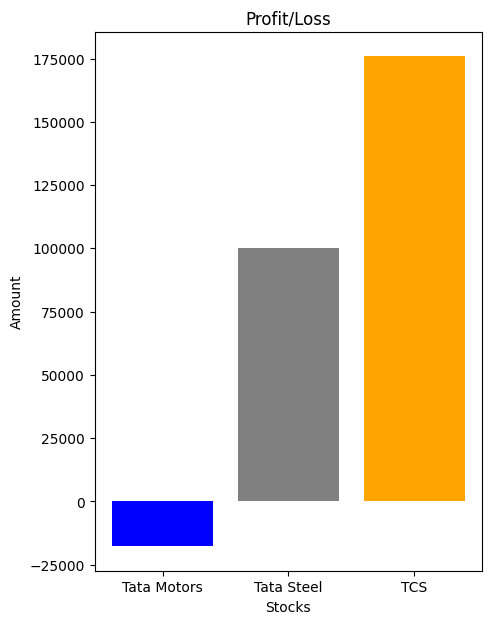

In [20]:
plt.figure(figsize=(5,7))

stock=['Tata Motors','Tata Steel','TCS']

amt=[result1,result2,result3]

col=['Blue','Grey','Orange']




plt.bar(stock,amt,color=col)




plt.title("Profit/Loss")

plt.xlabel("Stocks")

plt.ylabel("Amount")

Text(0.5, 1.0, 'Portfolio Allocation')

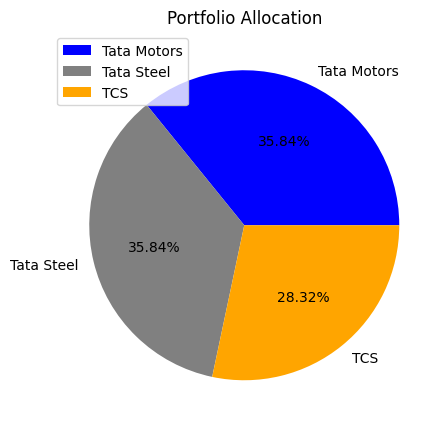

In [21]:
plt.figure(figsize=(5,7))

stock=['Tata Motors','Tata Steel','TCS']

shares=[s1,s2,s3]

col=['Blue','Grey','Orange']



plt.pie(shares,labels=stock,autopct="%1.2f%%",colors=col)

plt.legend(title="",loc="upper left")

plt.title("Portfolio Allocation")